Elizabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [7]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [8]:
datafile = '/u/ki/swmclau2/Git/HODEmulator/data/xi_gg_z0.0'
prediction = np.loadtxt(datafile) #r, xi_gg, xi_gg_1h

In [9]:
a = 1.0

rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2

In [10]:
#Chinchilla
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'chinchilla'
#boxsize_npart = [(125.0, 1024),(125.0, 2048), (250.0, 1024), (250.0, 128), (250.0, 196), (250.0, 2048),
#                (250.0, 2560), (250.0, 320), (250.0, 512), (250.0, 768), (250.0, 85), (400.0, 1024),
#                (400.0, 136), (400.0, 2048), (400.0, 210), (400.0, 315), (400.0, 512), (400.0, 768)]
boxsize_npart = [(125.0, 1024),(125.0, 2048), (250.0, 1024), (250.0, 2048),
                (250.0, 2560), (250.0, 512), (250.0, 768), (400.0, 1024),
                (400.0, 2048), (400.0, 768)]

ch_data = defaultdict(list)
version_names = []

for boxsize, npart in boxsize_npart:
#for sim in simnames:
    vn = 'Lb%d-%d'%(int(boxsize),npart )
    version_names.append(vn)
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_all_%.3f.npy'%(sim,vn,a)) )
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_1h_%.3f.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_2h_%.3f.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/wp_all_%.3f.npy'%(sim,vn,a)) )

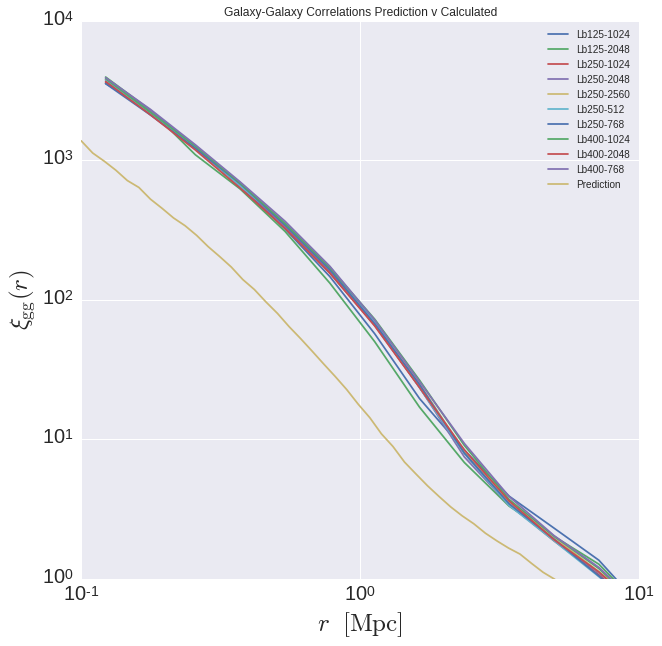

In [11]:
fig = plt.figure(figsize = (10,10))
for vn, color in zip(version_names, colors):
#for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, ch_data[vn][0], alpha = 1,
             label=vn, color=color)
             #label = sim, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Prediction', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
plt.title('Galaxy-Galaxy Correlations Prediction v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [12]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#simnames = ['fox']
simnames = ['multidark_highres', 'multidark', 'bolshoi', 'fox', 'emu']
#scale_factors = [0.25,0.333,0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
sf = {sim: a for sim in simnames}
sf['multidark_highres'] = 1.001
data = defaultdict(list)

#for sf in scale_factors:
for sim in simnames:
    data[sim].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf[sim])) )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

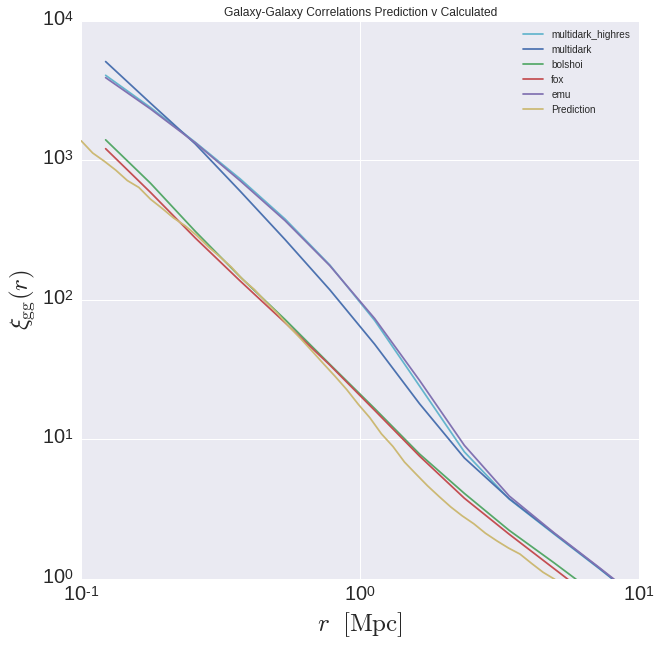

In [13]:
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, data[sim][0], alpha = 1,
             label = sim, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Prediction', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
plt.title('Galaxy-Galaxy Correlations Prediction v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [14]:
%%bash
ls ~/des/HODOutput/fox/*

/u/ki/swmclau2/des/HODOutput/fox/fox_xi.png
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.250.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.333.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.500.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.541.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.588.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.645.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.714.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.800.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_0.909.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_0.19.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_0.20.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_0.40.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_0.60.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_0.80.npy
/u/ki/swmclau2/des/HODOutput/fox/wp_all_1.000_fc_1.00.npy
/u/ki/swmclau2/des/HODOutput/fox/xi_1h_0.250.npy
/u/ki/swmclau2/des/HODOutput/fox/xi_1h_0.333.npy
/u/ki/swmc

In [17]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'fox'
a = 1.0
params = [.2,.4,.6,.8,1.0]
data = defaultdict(list)

for fc in params:
    data[fc].append( np.loadtxt(outputdir+'%s/xi_all_%.3f_fc_%.2f.npy'%(sim,sf[sim],fc)) )
    data[fc].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[fc].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[fc].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

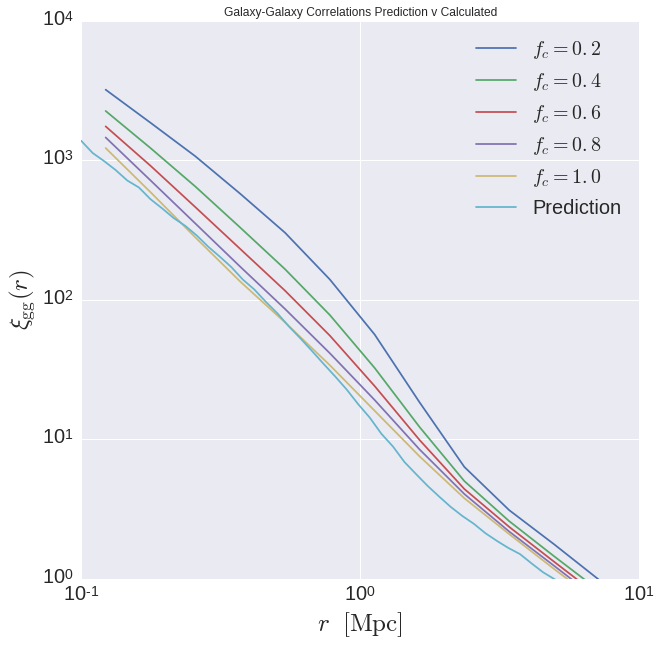

In [28]:
colors = sns.color_palette()
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for f_c, color in zip(params, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, data[f_c][0], alpha = 1,
             label = '$f_c = %.1f$'%f_c, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = colors[len(params)]
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Prediction', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
plt.title('Galaxy-Galaxy Correlations Prediction v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()